# Imports, loading and checking the dataset

In [37]:
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

font = {'family' : 'normal',
        'size'   : 30}

matplotlib.rc('font', **font)

In [2]:
df = pd.read_csv('mypersonality_final/mypersonality_final.csv', encoding = 'latin_1')

Let's get a first look at the dataset

In [3]:
df.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she ca...,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
2,b7b7764cfa1c523e4e93ab2a79a946c4,is sore and wants the knot of muscles at the b...,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/22/09 04:48 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/20/09 02:31 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1


What are the numerical features of the dataset ? How are they distributed ?

In [4]:
df.describe()

,sEXT,sNEU,sAGR,sCON,sOPN,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
count,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9.917000e+03,9917.000000,9917.000000,9.917000e+03,9917.000000,9916.000000
mean,3.354760,2.609453,3.616643,3.474201,4.130386,429.377120,1.354253e+05,94.665170,3.154012,1.376425e+05,0.489920,0.128821
std,0.857578,0.760248,0.682485,0.737215,0.585672,428.760382,1.994338e+05,5.506696,311.073343,2.013921e+05,0.011908,0.106063
min,1.330000,1.250000,1.650000,1.450000,2.250000,24.000000,9.325000e+01,0.040000,0.000000,4.900000e-01,0.180000,0.000000
25%,2.710000,2.000000,3.140000,3.000000,3.750000,196.000000,1.690220e+04,93.770000,0.010000,1.798200e+04,0.490000,0.060000
50%,3.400000,2.600000,3.650000,3.400000,4.250000,317.000000,4.716690e+04,96.440000,0.020000,4.868300e+04,0.490000,0.090000
75%,4.000000,3.050000,4.150000,4.000000,4.550000,633.000000,1.966060e+05,97.880000,0.030000,1.981860e+05,0.500000,0.170000
max,5.000000,4.750000,5.000000,5.000000,5.000000,29724.900000,1.251780e+06,99.820000,30978.000000,1.263790e+06,0.500000,0.630000


# Part 3

Using the data, compute the following descriptive statistics
* Total number of users – user-level stats
* Total number of status updates – status level stats
* Statistics of status updates per user (Mean, Median, Min, Max, Std)

In [5]:
print('Total number of users :', len(df['#AUTHID'].value_counts()))

Total number of users : 250


In [6]:
print('Total number of status updates :', len(df['STATUS'].value_counts()))

Total number of status updates : 9879


In [7]:
def descriptive_stats(stats):
    
    text = 'Mean : ' + str(np.around(stats.mean(), decimals = 2)) + '\n' +\
           'Median : ' + str(np.around(stats.median(), decimals = 2)) + '\n' +\
           'Min : ' + str(np.around(stats.min(), decimals = 2)) + '\n' +\
           'Max : ' + str(np.around(stats.max(), decimals = 2)) + '\n' +\
           'Std : ' + str(np.around(stats.std(), decimals = 2)) 
    
    return text

In [8]:
print('=== Statistics of status updates per user ===', '\n' + descriptive_stats(df['#AUTHID'].value_counts()))

=== Statistics of status updates per user === 
Mean : 39.67
Median : 25.0
Min : 1
Max : 223
Std : 43.56


One can already note that the differences between users are significant. In particular, one can remark that the average is pulled upwards (relative to the median) because of some users who post a very large number of status.

# Part 4

Plot the cumulative distribution (like in Slide 20 of Lecture 2 part 1) for
* Number of status updates per user (i.e., at the user level)
* Number of characters per status message (i.e., at the status update level)

In [9]:
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style("ticks")

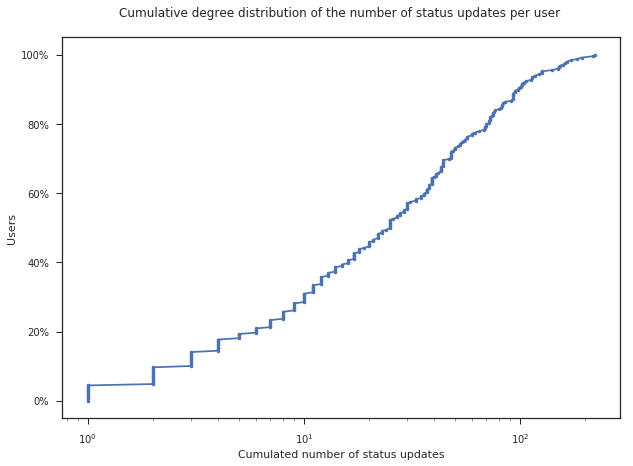

In [38]:
df_ = df['#AUTHID'].value_counts().sort_values(ascending = True).reset_index()['#AUTHID']
plt.semilogx(df_.values, df_.index, '.-')
plt.xlabel('Cumulated number of status updates')
plt.ylabel('Users')
plt.yticks(np.linspace(df_.index[0], df_.index[-1], 6), ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.title('Cumulative degree distribution of the number of status updates per user \n')
plt;

The curve is sigmoidal in appearance, with a few more marked steps (especially with the first three steps which include users who have posted 1, 2, or 3 status respectively). We also notice the tail at the top right, which includes about 5-10% of all users, and represents the users who post the most. The head (low activity users) is much bigger, with about 20% of all users.

In [11]:
df['length'] = 0

for ind, item in df['STATUS'].iteritems():
    df['length'][ind] = len(item)    

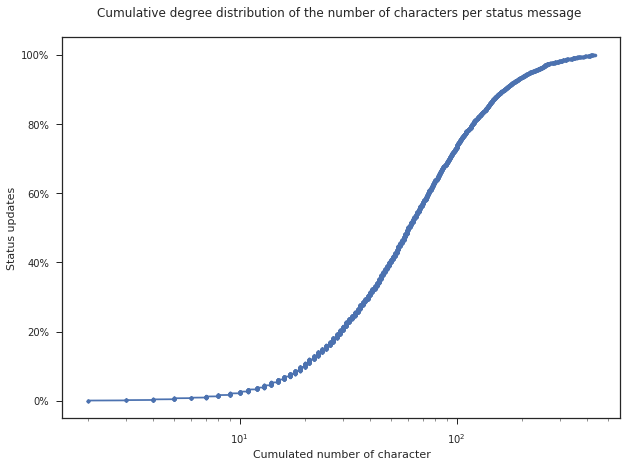

In [39]:
df_ = df['length'].sort_values(ascending = True).reset_index()['length']
plt.semilogx(df_.values, df_.index, '.-')
plt.xlabel('Cumulated number of character')
plt.ylabel('Status updates')
plt.yticks(np.linspace(df_.index[0], df_.index[-1], 6), ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.title('Cumulative degree distribution of the number of characters per status message \n')
plt;

This time, the curve is clearly sigmoidal and much smoother. This is because the parameter under which we observe this distribution (the number of characters) has a higher granularity, which limits the step effects. The distribution is better centered this time, since the head and tail each represent about 10% of the users, in a relatively equal way. One could conclude that there is less sparsity w.r.t the length of the status than with the number of status posted.

# Part 5
For 2 of the 7 network features (Network Size, and a second feature of your own choice), do the following:
* Compute descriptive statistics for each feature per user (Mean, Median, Min, Max, Std)
* Plot the cumulative distribution for each feature per user.


In [13]:
def textual_description(df, feature, feature_name = None):
    
    if feature_name == None :
        feature_name = feature.lower()
    
    df_ = df[['#AUTHID', feature]].drop_duplicates(['#AUTHID'])[feature]
    
    print('=== Statistics of', feature_name, 'per user === \n' + descriptive_stats(df_))
    
    return None

In [61]:
def visual_description(df, feature, feature_name = None, type_ = 'log'):
    
    if feature_name == None :
        feature_name = feature.lower()
        
    df_ = df[['#AUTHID', feature]].drop_duplicates(['#AUTHID'])[feature].sort_values(
        ascending = True).reset_index()[feature]
    
    if type_ == 'log':
        plt.semilogx(df_.values, df_.index, '.-')
    else:
        plt.plot(df_.values, df_.index, '.-')
        
    plt.ylabel('Users')
    plt.yticks(np.linspace(df_.index[0], df_.index[-1], 6), ['0%', '20%', '40%', '60%', '80%', '100%'])
    plt.xlabel('Cumulated ' + feature_name)
    plt.title('Cumulative degree distribution of the ' + feature_name + ' per user \n')    
    

In [15]:
textual_description(df, 'NETWORKSIZE', 'network size')

=== Statistics of network size per user === 
Mean : 408.01
Median : 315.0
Min : 24.0
Max : 1596.0
Std : 316.64


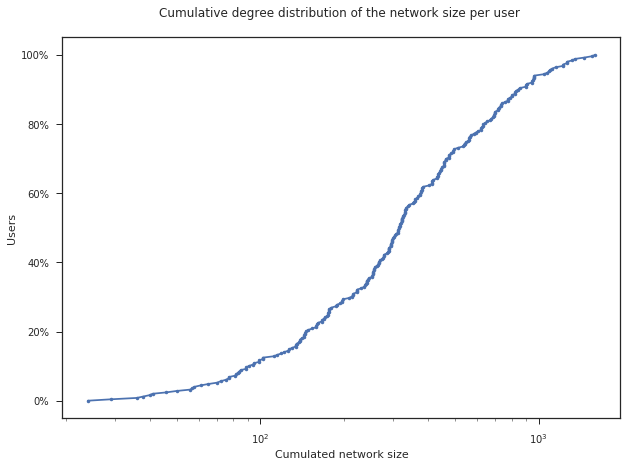

In [50]:
visual_description(df, 'NETWORKSIZE', 'network size')

Here again, one can note an important sparsity between the different users with regard to the size of their network. About 15% of the users have a rather small network (under 100), while 10% of the users have a large network (over 1000).

In [17]:
textual_description(df, 'BETWEENNESS')

=== Statistics of betweenness per user === 
Mean : 128936.8
Median : 46636.1
Min : 185.71
Max : 1251780.0
Std : 204807.61


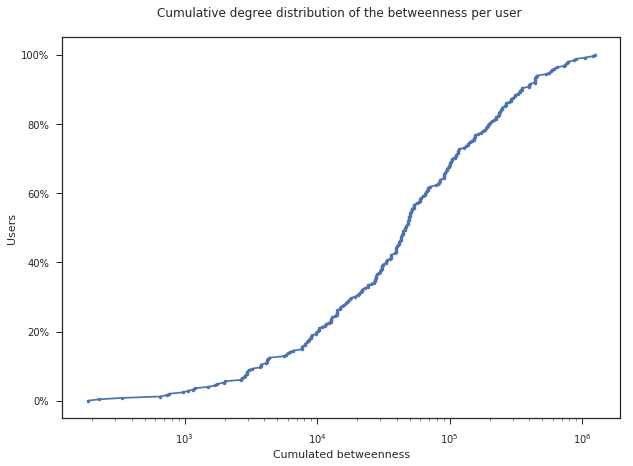

In [59]:
visual_description(df, 'BETWEENNESS')

The betweenness distribution profile is very much like the network size distribution profile, but covers a wider range of values of about 4 orders of magnitude. This is reflected in the very high standard deviation.

# Part 6
For the 5 personality trait features, do the following:
* Compute descriptive statistics for each trait per user (Mean, Median, Min, Max, Std)
* Plot the cumulative distribution for each big-5 trait per user.

In [19]:
df.columns

Index(['#AUTHID', 'STATUS', 'sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN', 'cEXT',
       'cNEU', 'cAGR', 'cCON', 'cOPN', 'DATE', 'NETWORKSIZE', 'BETWEENNESS',
       'NBETWEENNESS', 'DENSITY', 'BROKERAGE', 'NBROKERAGE', 'TRANSITIVITY',
       'length'],
      dtype='object')

In [20]:
textual_description(df, 'sEXT', 'extraversion')

=== Statistics of extraversion per user === 
Mean : 3.29
Median : 3.3
Min : 1.33
Max : 5.0
Std : 0.86


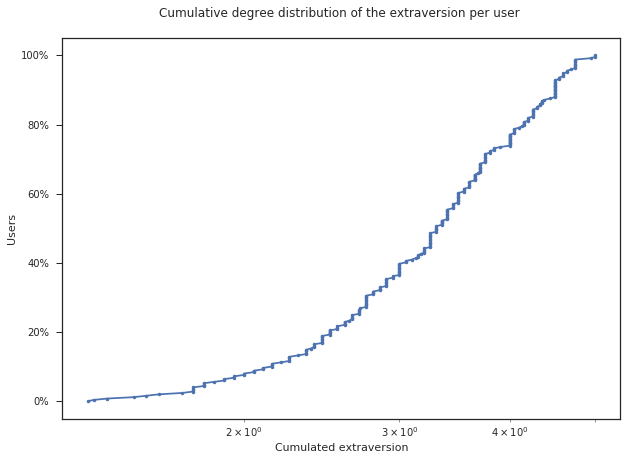

In [64]:
visual_description(df, 'sEXT', 'extraversion')

We notice the absence of a tail at this distribution. This means that there are no "super-extraverted" people who demonstrate outstanding extroversion. On the other hand, there is a core group of introverted people, who represent about 15% of the population.

In [22]:
textual_description(df, 'sNEU', 'neuroticism')

=== Statistics of neuroticism per user === 
Mean : 2.63
Median : 2.59
Min : 1.25
Max : 4.75
Std : 0.78


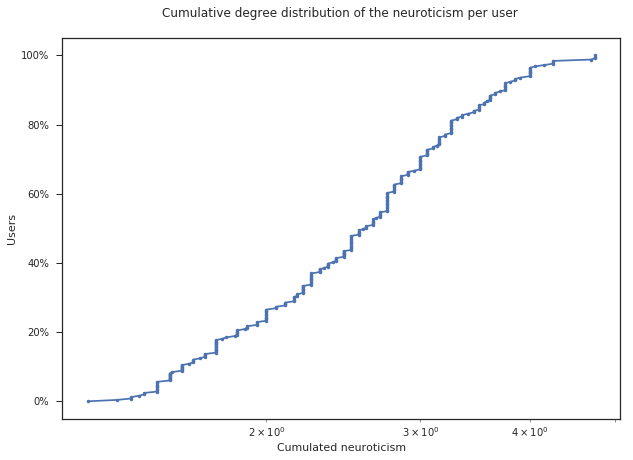

In [54]:
visual_description(df, 'sNEU', 'neuroticism')

The tail and head again have very few people (about 5-7 each time), while the vast majority of people are in intermediate values.

In [65]:
textual_description(df, 'sAGR', 'agreeableness')

=== Statistics of agreeableness per user === 
Mean : 3.6
Median : 3.66
Min : 1.65
Max : 5.0
Std : 0.67


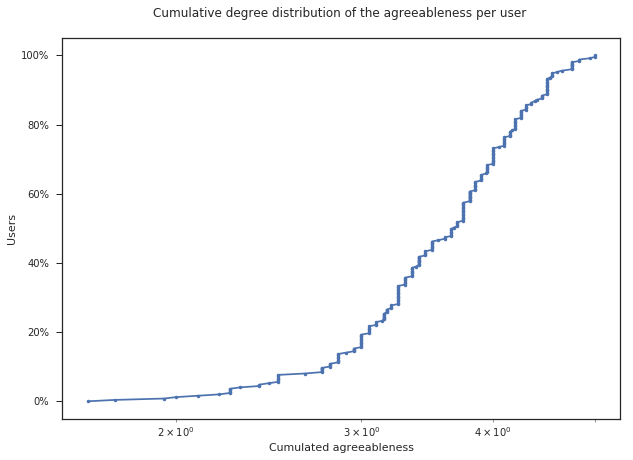

In [66]:
visual_description(df, 'sAGR', 'agreeableness')

Here, the distribution is extremely distorted. We have a very long head, which means that some people (at least 10) are well below the median, with a very low level of agreeableness compared to the rest of the group.

In [26]:
textual_description(df, 'sCON', 'conscientiousness')

=== Statistics of conscientiousness per user === 
Mean : 3.52
Median : 3.5
Min : 1.45
Max : 5.0
Std : 0.74


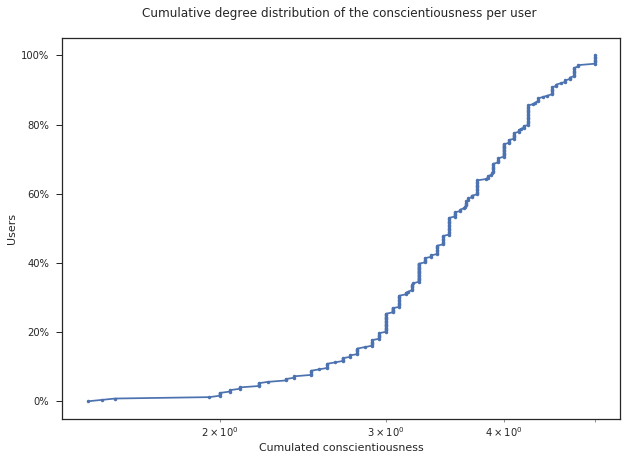

In [57]:
visual_description(df, 'sCON', 'conscientiousness')

Here again, the distribution is distorted. We have a very long head, with at least three people who appear to be complete outliers (with a very low level of conscientiousness).

In [28]:
textual_description(df, 'sOPN', 'openness')

=== Statistics of openness per user === 
Mean : 4.08
Median : 4.15
Min : 2.25
Max : 5.0
Std : 0.58


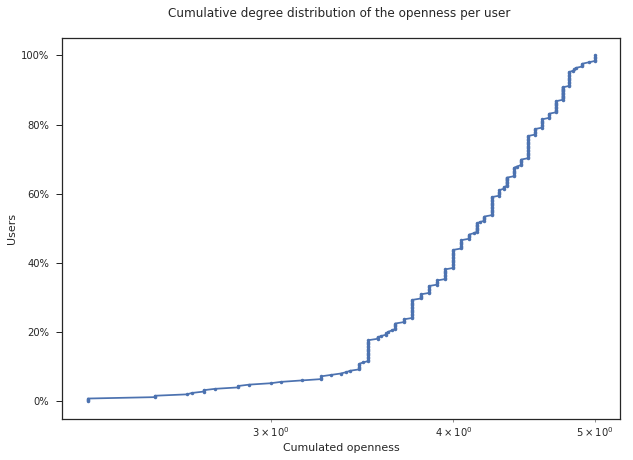

In [58]:
visual_description(df, 'sOPN', 'openness')

Dans cette distribution, on remarque qu'il n'y a pas de queue, mais une tête très longue. Cela signifie d'une part qu'il n'y a personne qui se distingue par une ouverture particulièrement élevée. Par contre, un groupe d'environ 10% des personnes ont un niveau d'ouverture remarquablement bas.

# Part 7
Compute a correlation matrix (at the user level), indicating correlation values and p-values for
* Big-5 traits (5x5 matrix)
* Big-5 traits vs. network features (5x7 matrix)

In [76]:
font = {'family' : 'normal', 'size'   : 15}
matplotlib.rc('font', **font)

sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("ticks")

In [30]:
def compute_p_val(df):
    
    cols = pd.DataFrame(columns = df.columns)
    p_val = cols.transpose().join(cols, how = 'outer')
    
    for col_1 in df.columns:
        for col_2 in df.columns:
            p_val[col_1][col_2] = np.around(pearsonr(df[col_1], df[col_2])[1], decimals = 5)
            
    return p_val

In [31]:
df_traits_vs_traits = df.drop_duplicates(subset = '#AUTHID')[['sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN']]

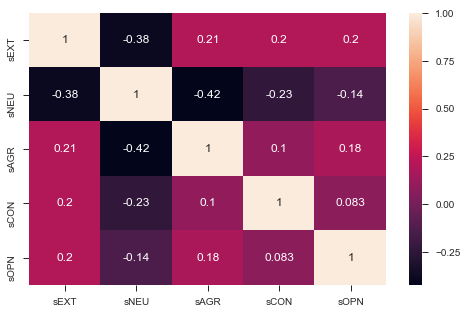

In [77]:
sns.heatmap(df_traits_vs_traits.corr(), annot = True);

In [88]:
compute_p_val(df_traits_vs_traits)

,sEXT,sNEU,sAGR,sCON,sOPN
sEXT,0,0,0.00109,0.0014,0.00125
sNEU,0,0,0,0.00018,0.03269
sAGR,0.00109,0,0,0.11601,0.00438
sCON,0.0014,0.00018,0.11601,0,0.19295
sOPN,0.00125,0.03269,0.00438,0.19295,0


One can note that the various features are not independent. This is a major issue in social models, as it is very difficult to define independent markers in sociology. In that case, the correlation is especially strong between agreeableness and neuroticism (0.4 negative correlation) and between neuroticism and extraversion (0.4 negative correlation as well). Subjectively, these correlations make sense.

Most of the correlations in the table are significant (p-value less than.05), except for the correlations between agreeableness and conscientiousness, and the correlation between conscientiousness and openness). This does not mean that these pairs of variables can therefore be definitively considered as independent, but it does mean that we cannot reject the null hypothesis (i.e. that the correlation is null, therefore that the variables are independent) in these cases.

In [34]:
df_traits_vs_features = df.drop_duplicates(subset = '#AUTHID')[[
    'sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN',
    'NETWORKSIZE', 'BETWEENNESS', 'NBETWEENNESS', 'DENSITY', 'BROKERAGE', 'NBROKERAGE', 'TRANSITIVITY']]

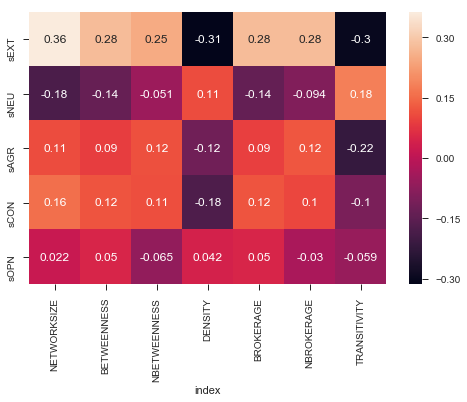

In [85]:
sns.heatmap(df_traits_vs_features.corr()[[
    'sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN']].reset_index()[5:12].set_index(['index']).transpose(), annot=True);

In [36]:
compute_p_val(df_traits_vs_features)[[
    'sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN']].reset_index()[5:12].set_index(['index']).transpose()

index,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
sEXT,0,1e-05,6e-05,0,1e-05,1e-05,0
sNEU,0.00426,0.0313,0.42193,0.0795,0.03041,0.14035,0.00419
sAGR,0.07893,0.15536,0.06796,0.05824,0.1539,0.05386,0.00057
sCON,0.01324,0.05633,0.07844,0.00531,0.05544,0.10765,0.10152
sOPN,0.73334,0.43204,0.3032,0.50507,0.43537,0.63865,0.35412


In the table above, we can see the impact of the different idiosyncrasies on the characteristics of the network. We notice at the outset that some features have a significant impact, such as extroversion, and that others have only a negligible impact (such as openness).

Extroversion has a significant positive impact on network size, betweenness and brokerage capacity. This seems logical, as these variables are probably also correlated with each other. On the other hand, the network of extroverted people tends to have a significantly lower density and transitivity. Agreeableness and conscientiousness tend to have an effect similar to extroversion, but unfortunately, p-values do not confirm this hypothesis in most cases.

Neuroticism has an inverse profile to that of extroversion on networksize, betweenness, brokerage and the transitivity, although with a lesser impact. For nbetweenness, nbrokerage and density, we cannot conclude. This tendency is not strange insofar as we saw above that extroversion and neuroticism are negatively correlated. It is therefore logical that they have the opposite effect on the explanation of the variables.

There is absolutely nothing to conclude about openness because the p-values are far too high.